# Importing library And Data

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv('train.csv', index_col = 'id')
test = pd.read_csv('test.csv', index_col = 'id')

# Droping unnecessary Column

In [3]:
cols_to_drop = ['keyword','location']
train.drop(cols_to_drop, axis = 1, inplace = True)
test.drop(cols_to_drop, axis = 1, inplace = True)

In [4]:
train.isna().sum()

text      0
target    0
dtype: int64

In [5]:
test.isna().sum()

text    0
dtype: int64

# Start cleaning the text data

In [6]:
train['text'] = train['text'].apply(lambda x: x.lower())
test['text'] = test['text'].apply(lambda x: x.lower())

In [ ]:
import re
import string
from nltk.corpus import stopwords

for i in range(len(train['text'])):
        # remove website links
        train['text'].iloc[i] = re.sub('www.|https://|http://|.com|t.co/','',train['text'].iloc[i])
        # remove all punctuation
        train['text'].iloc[i] = ''.join([j for j in train['text'].iloc[i] if j not in string.punctuation])
        # remove all digits
        train['text'].iloc[i] = ''.join([j for j in train['text'].iloc[i] if j not in string.digits])
        # remove non ASCII characters
        train['text'].iloc[i] = ''.join([j for j in train['text'].iloc[i] if ord(j) < 128])
        # remove stopwords
        train['text'].iloc[i] = ' '.join([j for j in train['text'].iloc[i].split() if j not in stopwords.words('english')])
        
for i in range(len(test['text'])):
        # remove website links
        test['text'].iloc[i] = re.sub('www.|https://|http://|.com|t.co/','',test['text'].iloc[i])
        # remove all punctuation
        test['text'].iloc[i] = ''.join([j for j in test['text'].iloc[i] if j not in string.punctuation])
        # remove all digits
        test['text'].iloc[i] = ''.join([j for j in test['text'].iloc[i] if j not in string.digits])
        # remove non ASCII characters
        test['text'].iloc[i] = ''.join([j for j in test['text'].iloc[i] if ord(j) < 128])
        # remove stopwords
        test['text'].iloc[i] = ' '.join([j for j in test['text'].iloc[i].split() if j not in stopwords.words('english')])

# Tokenizing

In [8]:
from nltk.tokenize import RegexpTokenizer
tokenizer= RegexpTokenizer(r'\w+')
train['text'].apply(lambda x: tokenizer.tokenize(x))
test['text'].apply(lambda x: tokenizer.tokenize(x))

id
0                         [happened, terrible, car, crash]
2        [heard, earthquake, different, cities, stay, s...
3        [forest, fire, spot, pond, geese, fleeing, acr...
9               [apocalypse, lighting, spokane, wildfires]
11               [typhoon, soudelor, kills, china, taiwan]
                               ...                        
10861    [earthquake, safety, los, angeles, safety, fas...
10865    [storm, ri, worse, last, hurricane, cityampoth...
10868       [green, line, derailment, chicago, utbxlcbiuy]
10874    [meg, issues, hazardous, weather, outlook, hwo...
10875    [cityofcalgary, activated, municipal, emergenc...
Name: text, Length: 3263, dtype: object

# Lemmatization

In [9]:
from nltk.stem import  WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
def word_lemmatizer(text):
    lem_text=[lemmatizer.lemmatize(i,pos="v") for i in text]
    return lem_text
train['text'].apply(lambda x: word_lemmatizer(x))
test['text'].apply(lambda x: word_lemmatizer(x))

id
0        [h, a, p, p, e, n, e, d,  , t, e, r, r, i, b, ...
2        [h, e, a, r, d,  , e, a, r, t, h, q, u, a, k, ...
3        [f, o, r, e, s, t,  , f, i, r, e,  , s, p, o, ...
9        [a, p, o, c, a, l, y, p, s, e,  , l, i, g, h, ...
11       [t, y, p, h, o, o, n,  , s, o, u, d, e, l, o, ...
                               ...                        
10861    [e, a, r, t, h, q, u, a, k, e,  , s, a, f, e, ...
10865    [s, t, o, r, m,  , r, i,  , w, o, r, s, e,  , ...
10868    [g, r, e, e, n,  , l, i, n, e,  , d, e, r, a, ...
10874    [m, e, g,  , i, s, s, u, e, s,  , h, a, z, a, ...
10875    [c, i, t, y, o, f, c, a, l, g, a, r, y,  , a, ...
Name: text, Length: 3263, dtype: object

In [10]:
print(train)
print(train.dtypes)
print(train.shape)

                                                    text  target
id                                                              
1           deeds reason earthquake may allah forgive us       1
4                  forest fire near la ronge sask canada       1
5      residents asked shelter place notified officer...       1
6      people receive wildfires evacuation orders cal...       1
7      got sent photo ruby alaska smoke wildfires pou...       1
...                                                  ...     ...
10869  two giant cranes holding bridge collapse nearb...       1
10870  ariaahrary thetawniest control wild fires cali...       1
10871                     utckm volcano hawaii zdtoydebj       1
10872  police investigating ebike collided car little...       1
10873  latest homes razed northern california wildfir...       1

[7613 rows x 2 columns]
text      object
target     int64
dtype: object
(7613, 2)


In [11]:
print(test)
print(test.dtypes)
print(test.shape)

                                                    text
id                                                      
0                            happened terrible car crash
2      heard earthquake different cities stay safe ev...
3      forest fire spot pond geese fleeing across str...
9                  apocalypse lighting spokane wildfires
11                   typhoon soudelor kills china taiwan
...                                                  ...
10861  earthquake safety los angeles safety fasteners...
10865  storm ri worse last hurricane cityampothers ha...
10868           green line derailment chicago utbxlcbiuy
10874   meg issues hazardous weather outlook hwo xrbqjhn
10875  cityofcalgary activated municipal emergency pl...

[3263 rows x 1 columns]
text    object
dtype: object
(3263, 1)


In [10]:
# remove all leading spaces
train['text'] = train['text'].apply(lambda x: x.lstrip())
test['text'] = test['text'].apply(lambda x: x.lstrip())

# remove all trailing spaces
train['text'] = train['text'].apply(lambda x: x.rstrip())
test['text'] = test['text'].apply(lambda x: x.rstrip())

In [12]:
train.to_csv('train clean.csv')
test.to_csv('test clean.csv')

# Vectorization

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

CV = CountVectorizer()
X_train = CV.fit_transform(train['text'])
Y_train = train['target']

X_test = CV.transform(test['text'])

# Word Cloud

In [13]:
disaster_tweets = train[train['target']==1]['text']
disaster_tweets.values[1]

'forest fire near la ronge sask canada'

In [14]:
non_disaster_tweets = train[train['target']==0]['text']
non_disaster_tweets.values[1]

'love fruits'

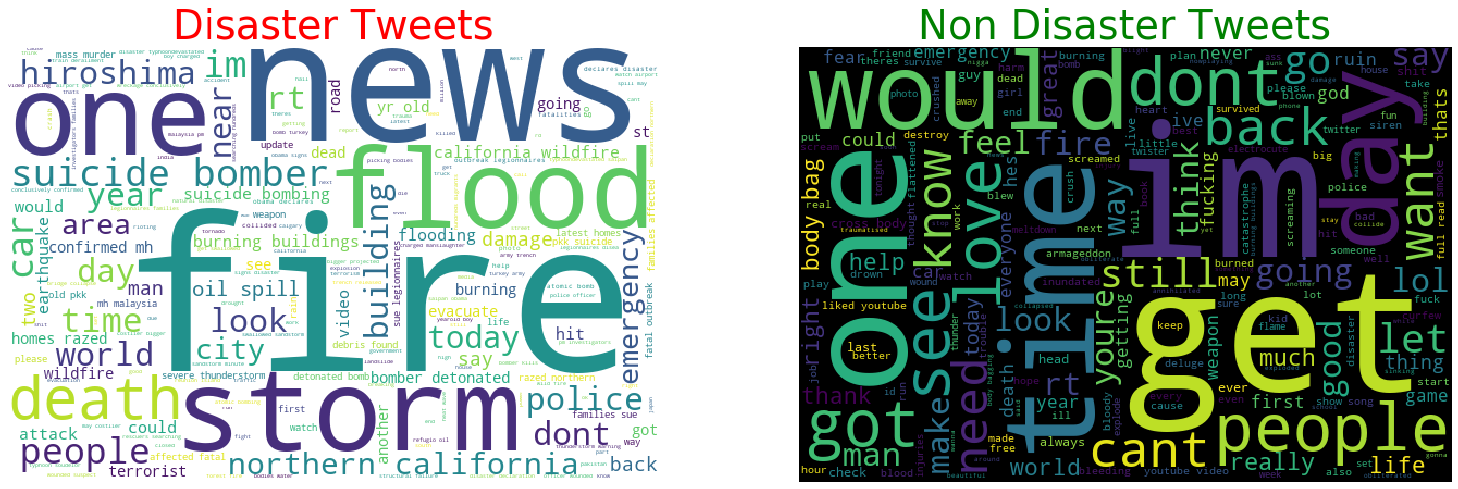

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

sw=["new","amp","like","us","via"]

fig, (ax1, ax2) = plt.subplots(1,2,figsize = [26,8])
wordcloud1 = WordCloud(background_color = 'white',stopwords=sw ,width = 600,height = 400).generate(" ".join(disaster_tweets))
ax1.imshow(wordcloud1)
ax1.axis('off')
ax1.set_title('Disaster Tweets',fontsize = 40,color = 'Red');

wordcloud2 = WordCloud(background_color = 'black',stopwords=sw ,width = 600,height = 400).generate(" ".join(non_disaster_tweets))
ax2.imshow(wordcloud2)
ax2.axis('off')
ax2.set_title('Non Disaster Tweets',fontsize = 40,color = 'Green');

# Splitting Dataset

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_train,Y_train,test_size=0.25,random_state=0)

# Applying different Models

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.model_selection import cross_val_score

clf_knn=KNeighborsClassifier(n_neighbors=1)
clf_knn.fit(x_train,y_train)
knn_pred=clf_knn.predict(x_test)

cfm_knn=confusion_matrix(y_test,knn_pred)
print(cfm_knn)
Accuracy_knn_train = clf_knn.score(x_train,y_train)
print("knn train score:-",Accuracy_knn_train)
Accuracy_knn_test = accuracy_score(y_test,knn_pred)
print("knn test score:-",Accuracy_knn_test)
cv_knn = cross_val_score(clf_knn, x_train, y_train, cv=5)
print("knn cross val score:-",round(cv_knn.mean(), 2) * 100)
print(classification_report(y_test,knn_pred))
knn_pred

[[1017   90]
 [ 444  353]]
knn train score:- 0.9957961114030478
knn test score:- 0.7195378151260504
knn cross val score:- 70.0
              precision    recall  f1-score   support

           0       0.70      0.92      0.79      1107
           1       0.80      0.44      0.57       797

    accuracy                           0.72      1904
   macro avg       0.75      0.68      0.68      1904
weighted avg       0.74      0.72      0.70      1904



array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [39]:
from sklearn.model_selection import GridSearchCV

parameters=[{'n_neighbors':[1,2,3,4,5,6]}]
grid_search= GridSearchCV(estimator= clf_knn,param_grid=parameters,scoring='accuracy',cv=5,n_jobs= -1)
grid_search=grid_search.fit(x_train,y_train)
best_accuracy_knn=grid_search.best_score_
best_parameters_knn=grid_search.best_params_
print(best_accuracy_knn)
print(best_parameters_knn)

0.696270055302213
{'n_neighbors': 1}


In [44]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.model_selection import cross_val_score

clf_xgb=XGBClassifier(learning_rate=0.8,random_state=0)
clf_xgb.fit(x_train,y_train)
xgb_pred=clf_xgb.predict(x_test)

cfm_xgb=confusion_matrix(y_test,xgb_pred)
print(cfm_xgb)
Accuracy_xgb_train = clf_xgb.score(x_train,y_train)
print("xgb train score:-",Accuracy_xgb_train)
Accuracy_xgb_test = accuracy_score(y_test,xgb_pred)
print("xgb test score:-",Accuracy_xgb_test)
cv_xgb = cross_val_score(clf_xgb, x_train, y_train, cv=5)
print("xgb cross val score:-",round(cv_xgb.mean(), 2) * 100)
print(classification_report(y_test,xgb_pred))
xgb_pred

[[1002  105]
 [ 278  519]]
xgb train score:- 0.8328954282711508
xgb test score:- 0.7988445378151261
xgb cross val score:- 77.0
              precision    recall  f1-score   support

           0       0.78      0.91      0.84      1107
           1       0.83      0.65      0.73       797

    accuracy                           0.80      1904
   macro avg       0.81      0.78      0.79      1904
weighted avg       0.80      0.80      0.79      1904



array([0, 1, 1, ..., 1, 1, 0], dtype=int64)

In [43]:
from sklearn.model_selection import GridSearchCV

parameters=[{'learning_rate' : [0.2,0.5,0.8,0.9],'random_state':[0,1,2,3]}]
grid_search= GridSearchCV(estimator= clf_xgb,param_grid=parameters,scoring='accuracy',cv=5,n_jobs= -1)
grid_search=grid_search.fit(x_train,y_train)
best_accuracy_xgb=grid_search.best_score_
best_parameters_xgb=grid_search.best_params_
print(best_accuracy_xgb)
print(best_parameters_xgb)

0.774043262508231
{'learning_rate': 0.8, 'random_state': 0}


In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.model_selection import cross_val_score

clf_rf=RandomForestClassifier(criterion='entropy',random_state = 0,n_estimators = 30)
clf_rf.fit(x_train,y_train)
rf_pred=clf_rf.predict(x_test)

cfm_rf=confusion_matrix(y_test,rf_pred)
print(cfm_rf)
Accuracy_rf_train = clf_rf.score(x_train,y_train)
print("rf train score:-",Accuracy_rf_train)
Accuracy_rf_test = accuracy_score(y_test,rf_pred)
print("rf test score:-",Accuracy_rf_test)
cv_rf = cross_val_score(clf_rf, x_train, y_train, cv=5)
print("rf cross val score:-",round(cv_rf.mean(), 2) * 100)
print(classification_report(y_test,rf_pred))
rf_pred

[[1037   70]
 [ 305  492]]
rf train score:- 0.9915922228060956
rf test score:- 0.803046218487395
rf cross val score:- 78.0
              precision    recall  f1-score   support

           0       0.77      0.94      0.85      1107
           1       0.88      0.62      0.72       797

    accuracy                           0.80      1904
   macro avg       0.82      0.78      0.79      1904
weighted avg       0.82      0.80      0.80      1904



array([0, 1, 0, ..., 1, 1, 0], dtype=int64)

In [41]:
from sklearn.model_selection import GridSearchCV

parameters=[{'n_estimators' : [10,20,30], 'criterion' : ['entropy'],'random_state':[0,1,2]},
           {'n_estimators' : [10,20,30], 'criterion' : ['gini'],'random_state':[0,1,2]}]
grid_search= GridSearchCV(estimator= clf_rf,param_grid=parameters,scoring='accuracy',cv=5,n_jobs= -1)
grid_search=grid_search.fit(x_train,y_train)
best_accuracy_rf=grid_search.best_score_
best_parameters_rf=grid_search.best_params_
print(best_accuracy_rf)
print(best_parameters_rf)

0.7771950128240352
{'criterion': 'entropy', 'n_estimators': 30, 'random_state': 0}


In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.model_selection import cross_val_score

clf_log=LogisticRegression(random_state=0)
clf_log.fit(x_train,y_train)
log_pred=clf_log.predict(x_test)

cfm_log=confusion_matrix(y_test,log_pred)
print(cfm_log)
Accuracy_log_train = clf_log.score(x_train,y_train)
print("log train score:-",Accuracy_log_train)
Accuracy_log_test = accuracy_score(y_test,log_pred)
print("log test score:-",Accuracy_log_test)
cv_log = cross_val_score(clf_log, x_train, y_train, cv=5)
print("log cross val score:-",round(cv_log.mean(), 2) * 100)
print(classification_report(y_test,log_pred))
log_pred

[[983 124]
 [244 553]]
log train score:- 0.9705727798213347
log test score:- 0.8067226890756303
log cross val score:- 79.0
              precision    recall  f1-score   support

           0       0.80      0.89      0.84      1107
           1       0.82      0.69      0.75       797

    accuracy                           0.81      1904
   macro avg       0.81      0.79      0.80      1904
weighted avg       0.81      0.81      0.80      1904



array([0, 1, 0, ..., 1, 1, 0], dtype=int64)

In [45]:
from sklearn.model_selection import GridSearchCV

parameters=[{'random_state':[0,1,2,3,4,5,6,7,8,9,10]}]
grid_search= GridSearchCV(estimator= clf_log,param_grid=parameters,scoring='accuracy',cv=5,n_jobs= -1)
grid_search=grid_search.fit(x_train,y_train)
best_accuracy_log=grid_search.best_score_
best_parameters_log=grid_search.best_params_
print(best_accuracy_log)
print(best_parameters_log)

0.7947099895473753
{'random_state': 0}


In [15]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.model_selection import cross_val_score

clf_svc=SVC(gamma=0.1)
clf_svc.fit(x_train,y_train)
svc_pred=clf_svc.predict(x_test)

cfm_svc=confusion_matrix(y_test,svc_pred)
print(cfm_svc)
Accuracy_svc_train = clf_svc.score(x_train,y_train)
print("svc train score:-",Accuracy_svc_train)
Accuracy_svc_test = accuracy_score(y_test,svc_pred)
print("svc test score:-",Accuracy_svc_test)
cv_svc = cross_val_score(clf_svc, x_train, y_train, cv=5)
print("svc cross val score:-",round(cv_svc.mean(), 2) * 100)
print(classification_report(y_test,svc_pred))
svc_pred

[[1027   80]
 [ 281  516]]
svc train score:- 0.9560343317568751
svc test score:- 0.8103991596638656
svc cross val score:- 79.0
              precision    recall  f1-score   support

           0       0.79      0.93      0.85      1107
           1       0.87      0.65      0.74       797

    accuracy                           0.81      1904
   macro avg       0.83      0.79      0.80      1904
weighted avg       0.82      0.81      0.80      1904



array([0, 1, 0, ..., 1, 1, 0], dtype=int64)

In [47]:
from sklearn.model_selection import GridSearchCV

parameters=[{'gamma':[0.1,0.2,0.3]}]
grid_search= GridSearchCV(estimator= clf_svc,param_grid=parameters,scoring='accuracy',cv=5,n_jobs= -1)
grid_search=grid_search.fit(x_train,y_train)
best_accuracy_svc=grid_search.best_score_
best_parameters_svc=grid_search.best_params_
print(best_accuracy_svc)
print(best_parameters_svc)

0.7922576902001655
{'gamma': 0.1}


# SVC gives good score for prediction, hence we use SVC model for prediction of disaster from tweets.

In [16]:
pred_svc=clf_svc.predict(X_test)

df = pd.DataFrame({'Id':test.index,'text':test.text,'Disaster Tweet':pred_svc})
df['Disaster Tweet'].replace(1, 'Yes',inplace=True)
df['Disaster Tweet'].replace(0, 'No',inplace=True) 

df.to_csv('prediction.csv', index = False)